In [5]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

In [6]:
# r2 index order [split,scaling,component,stat]
# split = interp or extrap
# scaling = stats, global, local
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

r2=np.array([
    #Interp
    [
     #Stats
        [[ 0.8830471924912544 , 0.013126323189482975],
            [0.6910130931745471 , 0.008225234049432905],
            [0.6559116877398562 , 0.008493761002762576],
            [0.7076212245894242 , 0.01311688354603715],
            [0.5914580583142742 , 0.0071942401102836106],
            [0.05820774459684728 , 0.09064786345420668]],
        #Global
        [[0.9336307919839368 , 0.012247319772136942],
            [0.7311840724126384 , 0.005845580088613346],
            [0.6637722282612601 , 0.008208671486152404],
            [0.6167546466860969 , 0.0070140504031875545],
            [0.5576499018957168 , 0.008918283223482464],
            [-0.02041077327893768 , 0.0640728464761644 ]],
        #Local
        [[0.9675189634088672 , 0.0006760344251361841],
            [0.7847936265861674 , 0.002189522185347632],
            [0.7659986197619928 , 0.003671091043143276],
            [0.8049517830655372 , 0.004348441883946166],
            [0.6848217207440672 , 0.0024984246562171223],
            [0.5124965576562747 , 0.0173732246351104]],
    ],
     #Extrap
    [
        #Stats
        [[ 0.4160906779452458 , 0.046531831447261356],
            [0.12105437575309404 , 0.0315363272835609],
            [0.17198881036387273 , 0.01893379813786168],
            [0.3995389244564576 , 0.0271694338382531],
            [0.20390898719670422 , 0.014280522281252084],
            [0.4126422496832588 , 0.022222732886785262]],
        #Global
        [[0.8314249168658702 , 0.0063659177413962955],
            [0.6111882361216205 , 0.00417033776235212],
            [0.6352161736853699 , 0.011833259365645658],
            [0.47109456347792467 , 0.01345533199921343],
            [0.5829964493573659 , 0.006937600142989493],
            [0.3889924288200228 , 0.0349591207899233]],
        #Local
        [[0.9426599621293021 , 0.002616905570269503],
            [0.7250409046305732 , 0.003494082943780181],
            [0.749884932917051 , 0.002351792553334112],
            [0.8035438352070564 , 0.0007109315832346912],
            [0.7107565049017734 , 0.002104486285047566],
            [0.6870028624564416 , 0.010455157823655999]]
    ]
    ])   

In [7]:
r2.shape

(2, 3, 6, 2)

In [8]:
# r2 index order [split,scaling,component,stat]
# split = interp or extrap
# scaling = stats, global, local
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

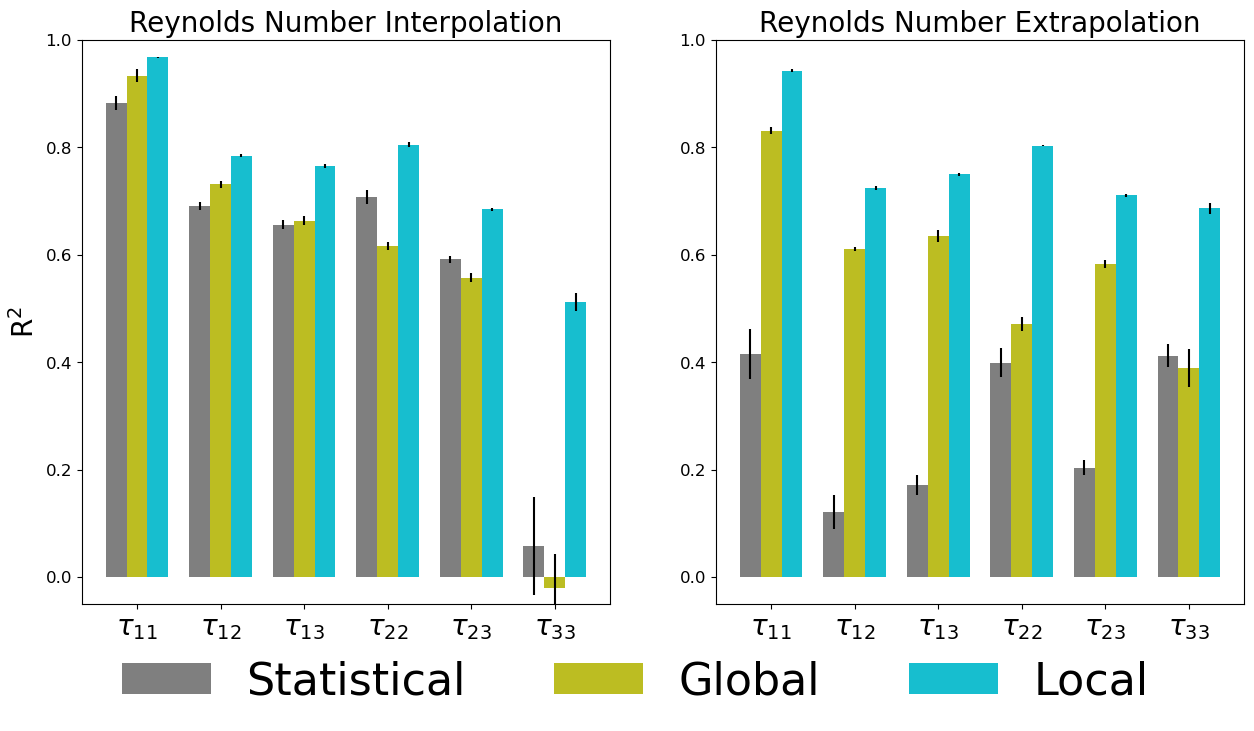

In [13]:
fs=20
ls=12

width = 1  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(1,2,figsize=(15,8))

ncomponent=r2.shape[-2]
component_text = [r'$\tau_{11}$', r'$\tau_{12}$', r'$\tau_{13}$', r'$\tau_{22}$', r'$\tau_{23}$', r'$\tau_{33}$']
nscaling = r2.shape[-3]
scaling_text = ['Statistical','Global','Local']
colors = ['tab:gray','tab:olive','tab:cyan']
x=np.arange(0,(nscaling+1)*ncomponent,nscaling+1)
offset=[-1,0,1]
task_text=['Reynolds Number Interpolation','Reynolds Number Extrapolation']

for itask in range(len(task_text)):
    for iscaling in range(nscaling):
        rects = ax[itask].bar(x + offset[iscaling], r2[itask,iscaling,:,0], width, label=scaling_text[iscaling], color=colors[iscaling])
        bars = ax[itask].errorbar(x + offset[iscaling], r2[itask,iscaling,:,0], yerr=r2[itask,iscaling,:,1], linestyle=' ', color='k')
        ax[itask].set_ylim(-.05, 1)
        ax[itask].set_xticks([])
        ax[itask].set_xticks(x, component_text,fontsize=fs) 
        ax[itask].set_title(task_text[itask],fontsize=fs)
        ax[itask].tick_params(axis='y',labelsize=ls)
#             ax[itask].legend(fontsize=32)
ax[0].set_ylabel(r'R$^2$',fontsize=fs)
       

#ax[1,1].legend(ncol=3,fontsize=32,loc='lower right')
fig.subplots_adjust(bottom=0.175)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels, loc='lower left', bbox_to_anchor=(0.125, 0.001),fontsize=32,ncol=3,frameon=False,framealpha=0)

fmt="eps"
plt.savefig('ReynoldsStats.'+fmt,format=fmt)#,transparent=True)